In [1]:
import numpy as np
import pandas as pd
from scipy.stats import kurtosis as scipy_kurtosis 

# Load Data
Load Half-Hourly UK System Cashout Prices.

Data Source: https://www.nordpoolgroup.com/historical-market-data/

In [2]:
# From URL
file_path = 'https://www.nordpoolgroup.com/48cd48/globalassets/marketdata-excel-files/n2ex-day-ahead-auction-prices_2018_hourly_gbp.xls'

# Or From File
#file_path = '../data/nordpool/n2ex-day-ahead-auction-prices_2018_hourly_gbp.xls'

In [3]:
# Load
raw_list = pd.read_html(file_path, decimal=',')
df = raw_list[0]

### Format Data

In [4]:
# Name Columns
df.columns = ['date','hour_UK','hour_EU','price']

# Format Date Column
df.date = pd.to_datetime(df.date, format='%d-%m-%Y')

# Format Hour Columns
df.hour_UK = df.hour_UK.str.slice(stop = 2)
df.hour_UK = pd.to_numeric(df.hour_UK)
df.hour_EU = df.hour_EU.str.slice(stop = 2)
df.hour_EU = pd.to_numeric(df.hour_EU)

# Convert Price to GBP
df.price = df.price/100

In [5]:
# Check NA values
nan_value_count = df.isna().any(axis=1).sum()
na_df = df.loc[df.isna().any(axis=1)]
#df.price.isna().sum()

print(f"NaN values count: {nan_value_count}")
print(f"NaN values table:")
display(na_df)

NaN values count: 1
NaN values table:


,date,hour_UK,hour_EU,price
1994,2018-03-25,1,2,NaN


In [6]:
# Drop NA values
df = df.dropna()

# Functions

In [7]:
def moment(arr, i: int):
    """Calculate the ith central moment of array like input `arr`"""
    
    moment = ((arr-arr.mean())**i).sum() / len(arr)
    
    return moment

In [8]:
def my_kurtosis(arr):
    """Calculate Pearson Kurtosis.
    
    Returns 3 for normal distribution."""

    kurtosis = moment(arr, 4) / moment(arr, 2)**2
    
    return kurtosis

# Analyse

In [9]:
df.head()

,date,hour_UK,hour_EU,price
0,2018-01-01,23,0,42.94
1,2018-01-01,0,1,47.14
2,2018-01-01,1,2,54.60
3,2018-01-01,2,3,46.63
4,2018-01-01,3,4,39.90


Text(0.5, 1.0, 'Monthly Average')

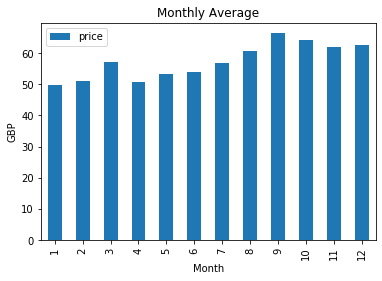

In [10]:
# Monthly Average
ax = df.groupby(df.date.dt.month).mean().loc[:,['price']].plot(kind='bar')
ax.set_xlabel("Month")
ax.set_ylabel("GBP")
ax.set_title("Monthly Average")

Text(0.5, 1.0, 'Price Histogram')

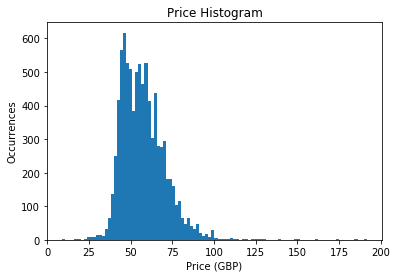

In [11]:
# Price Histogram
ax = df.price.plot.hist(bins=100)
ax.set_xlabel("Price (GBP)")
ax.set_ylabel("Occurrences")
ax.set_title("Price Histogram")

Text(0.5, 1.0, 'UK Electricity 2018 - System Cashout - Half Hourly Prices')

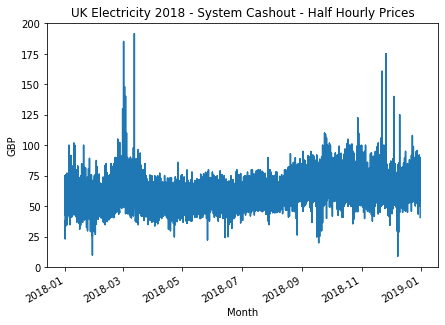

In [12]:
ax = df.set_index([df.date]).price.plot(figsize=[7,5])
ax.set_xlabel("Month")
ax.set_ylabel("GBP")
ax.set_title("UK Electricity 2018 - System Cashout - Half Hourly Prices")

# Moments

In [13]:
# Second Moment
moment(df.price, 2)

171.96289118768243

In [14]:
# Variance is Second Moment
df.price.var()

171.98252389588976

In [15]:
# Print the Moments
for i in range(0,7):
    print(f'Moment {i} is: {"{:.0e}".format(moment(df.price, i))}')

Moment 0 is: 1e+00
Moment 1 is: 4e-14
Moment 2 is: 2e+02
Moment 3 is: 3e+03
Moment 4 is: 2e+05
Moment 5 is: 2e+07
Moment 6 is: 2e+09


# Kurtosis

##### Fisher Kurtosis

In [16]:
df.price.kurtosis()

5.410562356419502

In [17]:
scipy_kurtosis(df.price, bias=False)

5.410562356419501

In [18]:
scipy_kurtosis(df.price)

5.406789776080172

## Pearson Kurtosis

In [19]:
# Pearson Kurtosis
scipy_kurtosis(df.price, fisher=False)

8.406789776080172

In [20]:
# My Kurtosis Function
my_kurtosis(df.price)

8.406789776080185